In [1]:
#-----------------------------------------------------------------------
# Solution to the compressible Blasius equation (boundary value problem)
#
# 2 (ρ μ f'')' + f f'' = 0
# (ρ μ h')' + Pr f h' + Pr (γ-1) Ma^2 ρ μ (f'')^2 = 0
#
# where
#    f: Similarity form for the stream function = ψ/√(2 ν_∞ U x)
#    h: Specific enthalpy at the wall
#
# with isothermal bc:
#     f(0)  = f'(0) = 0 
#     f'(∞) = 1
#     h(∞)  = 1
#     h     = θ(0)
#
# following Howarth-Dorodnitsyn transformation 
#     θ     = T / T_∞
#-----------------------------------------------------------------------

In [2]:
using Plots
using Polynomials
using FastGaussQuadrature
using NLsolve

In [3]:
default(linewidth=4)
γ = 1.4  # specific heat ratio
Pr = 0.7 # Prandtl number
Ma = 5.0 # Mach number

5.0

In [4]:
η_max = 10.0
N = 30
x_resid = gausslegendre(N-3)[1]
dx_dη = 2 / η_max

UnpackCheb(X) = ChebyshevT(X[1:N]), ChebyshevT(X[N+1:end])

UnpackCheb (generic function with 1 method)

In [5]:
X = zeros(2N-1);

In [6]:
function CompressibleBlasiusResidual(X)
    f, h = UnpackCheb(X)
    f_η = derivative(f, 1) * dx_dη
    f_ηη = derivative(f_η, 1) * dx_dη
    f_ηηη = derivative(f_ηη, 1) * dx_dη
    h_η = derivative(h, 1) * dx_dη
    h_ηη = derivative(h_η, 1) * dx_dη
    blasius = 2 * f_ηηη + f_ηη * f
    blasius_h = h_ηη + Pr * f * h_η + Pr * (γ - 1) * Ma * Ma * f_ηη * f_ηη # enthalpy equation
    R = zeros(2N-1)
    R[1] = f(-1)
    R[2] = f_η(-1)
    R[3] = f_η(1.) - 1
    R[4:N] = blasius.(x_resid)
    R[N+1] = h(-1.) - 2
    R[N+2] = h(1) - 1
    R[N+3:end] = blasius_h.(x_resid)
    R
end

CompressibleBlasiusResidual (generic function with 1 method)

In [7]:
solution = nlsolve(CompressibleBlasiusResidual, X)
f, h = UnpackCheb(solution.zero)
f_η  = derivative(f, 1) * dx_dη
f_ηη = derivative(f_η, 1) * dx_dη;

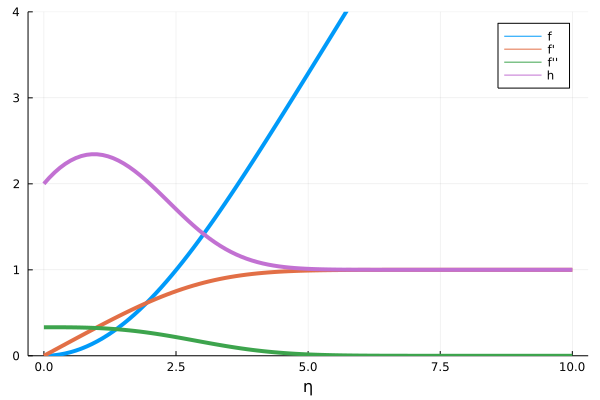

In [8]:
x = LinRange(-1, 1, 100)
η = (x .+ 1) * η_max / 2
plot(η, [f.(x) f_η.(x) f_ηη.(x) h.(x)], label=["f" "f'" "f''" "h"], ylim=(0, 4))
xlabel!("η")